In [1]:
% matplotlib inline

import numpy as np
import pandas as pd
import json
import sys
import os
import matplotlib
#matplotlib.use('Agg') 
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from matplotlib import cm
from matplotlib.ticker import LinearLocator, FormatStrFormatter
import seaborn as sns
import pdb
#import ipdb
import h5py
import importlib
import pickle
import math

# Add root folder to sys path
sys.path.append("../")

from load_expert_traj import recursively_save_dict_contents_to_group

# %pylab inline
# inline doesn't give interactive plots
%matplotlib inline 
# %matplotlib notebook
plt.rcParams['figure.figsize'] = (6.0, 6.0) # set default size of plots
plt.rcParams['image.interpolation'] = 'nearest'
plt.rcParams['image.cmap'] = 'Blues'

sns.set()

# for auto-reloading external modules
# see http://stackoverflow.com/questions/1907993/autoreload-of-modules-in-ipython
%load_ext autoreload
%autoreload 2

# Import own modules
# Need to use importlib since module starts with a numerical value.

/home/mohit/anaconda3/lib/python3.6/site-packages/h5py/__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters


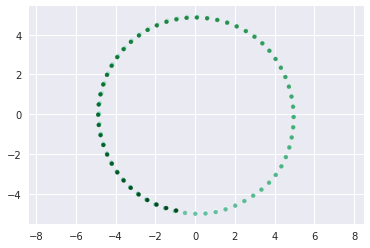

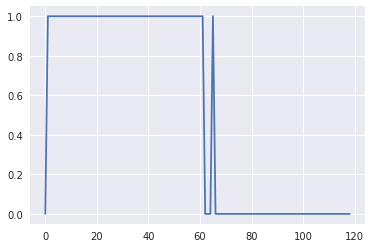

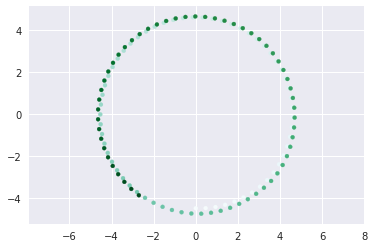

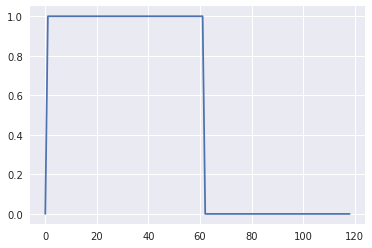

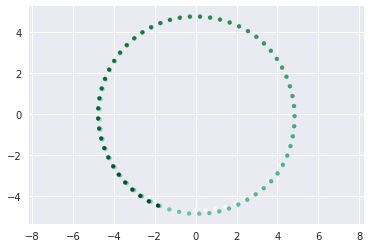

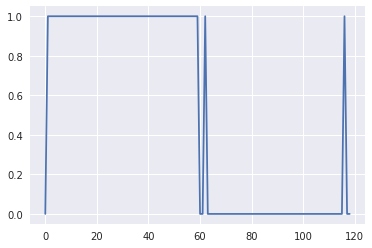

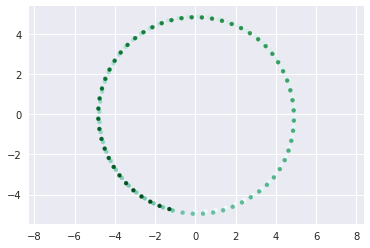

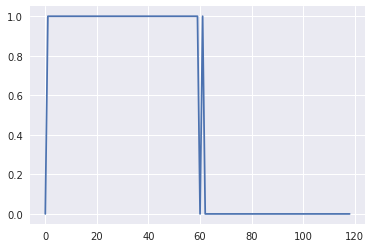

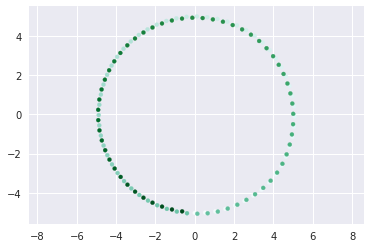

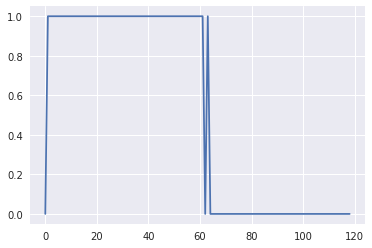

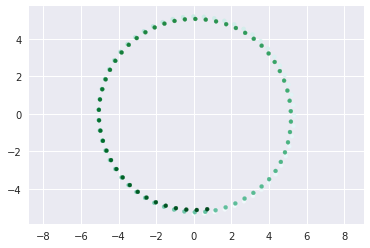

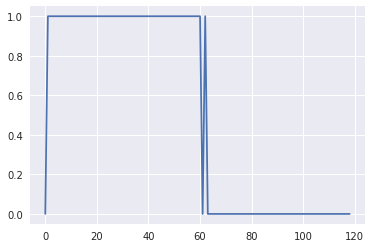

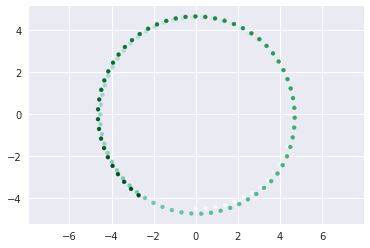

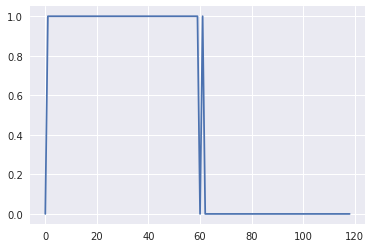

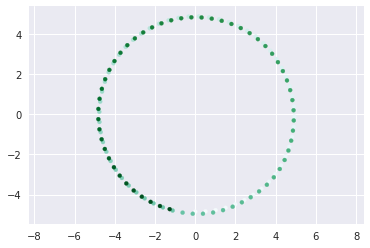

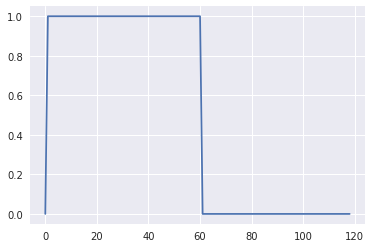

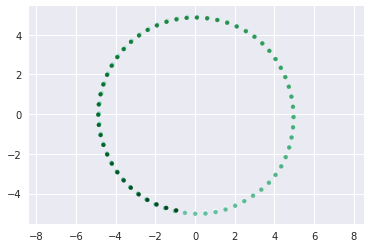

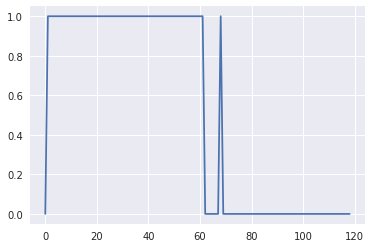

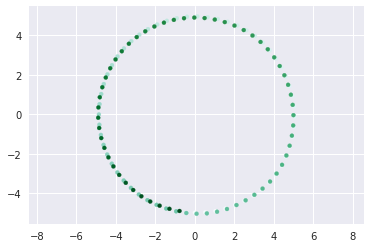

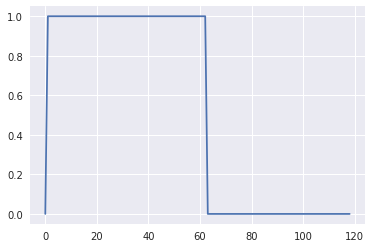

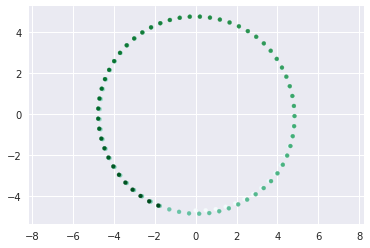

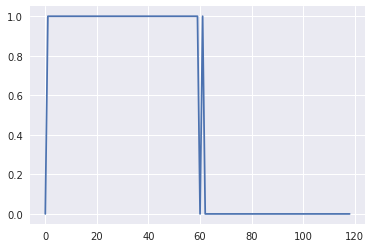

In [11]:
def softmax(x):
    if len(x.shape) == 2:
        new_x = x - np.max(x,axis=1)[:, np.newaxis]
        denom = np.sum(np.exp(new_x), axis = 1)[:, np.newaxis]
        return np.exp(new_x)/denom
    elif len(x.shape) == 1:
        new_x = x - np.max(x)
        denom = np.sum(np.exp(new_x))
        return np.exp(new_x) / denom
    else:
        raise ValueError("incorrect softmax input")
                              
def plot_circle(x_list, y_list, colors, title='', move_centre=False):
    T = 60
    if move_centre:
        shift = .2
        x_list_new = [x_list[i] + shift for i in range(T, len(x_list))]
        x_list = x_list[:T] + x_list_new
    plt.scatter(x_list, y_list, color=colors, s=16) 
    plt.axis('equal')    
    plt.title(title)
    plt.show()

    
# results_pkl_path = '../results/circle/vae/epoch_400_traj_40_meta_2_r_0.011_Aug_6_5_50_PM/results_cp_400.pkl'
# results_pkl_path = '../results/vae/tmp/meta_1_traj_50_traj_len_180_policy_output_normalized_context_3_goal_1_history_5_epoch_1000_temperature_5_noisy_next_state_lr_1e-4/results_cp_500.pkl'
# results_pkl_path = '../results/vae/tmp/meta_1_traj_50_traj_len_180_policy_output_normalized_context_2_goal_1_history_5_epoch_1000_temperature_5_noisy_next_state_lr_1e-4/results_605.pkl'
# results_pkl_path = '../results/vae/tmp/meta_1_traj_50_traj_len_180_policy_output_normalized_context_2_goal_1_history_5_epoch_1000_temperature_5_no_noisy_next_state_lr_1e-4/results_cp_800.pkl'
# results_pkl_path = '../results/vae/tmp/meta_1_traj_50_traj_len_180_policy_output_normalized_context_3_goal_1_history_5_epoch_1000_temperature_5_noisy_next_state/results_cp_1500.pkl'

results_pkl_path = '../results/circle/vae/traj_meta_1_traj_100_opposite_circles_equal_radii_epoch_1000_batch_64_1-cos_cos_wt_ratio_50/results_1000.pkl'
results_pkl_path = '../results/circle/gail/meta_1_traj_100_opposite_circles_equal_radii_action_policy_output_normalized_context_2_goal_1_history_1_posterior_0.1_lr_1e-4/results_cp_1900.pkl'

with open(results_pkl_path, 'rb') as results_f:
    results_data = pickle.load(results_f)

num_trajs = len(results_data['pred_traj_state'][0])
context_colors = ['g', 'b', 'r', 'm', 'y', 'c', 'k', 'w']
#markers = ['.', 'v', 'o', 's']

# pdb.set_trace()

x_pos_list, y_pos_list, c_list = [], [], []
for i in range(num_trajs):
    traj_state = np.array(results_data['pred_traj_state'][0][i]).squeeze()
    traj_action = np.array(results_data['pred_traj_action'][0][i]).squeeze()
    traj_context = np.array(results_data['pred_context'][0][i]).squeeze()
    traj_context_label = np.argmax(traj_context, axis=1)
    traj_context_color = [context_colors[i] for i in traj_context_label]
    # pdb.set_trace()
    blue_palette = sns.color_palette("BuGn", 120)
    #green_palette = sns.color_palette("Greens", 60)
    traj_context_color = blue_palette
    plot_circle(traj_state[:, 0].tolist(), traj_state[:, 1].tolist(),
                traj_context_color,
                move_centre=False)
    plt.plot(traj_context_label)
    plt.show()